In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from networkx.algorithms.community import label_propagation_communities, girvan_newman
import community
from networkx.algorithms.community import girvan_newman
from google.colab import files
import random
from sklearn.metrics import silhouette_score
from networkx.algorithms.community import girvan_newman
from sklearn.preprocessing import StandardScaler

In [2]:
# Upload files
uploaded = files.upload()

# Load datasets
karate_graph = nx.karate_club_graph()
#karate_graph = nx.read_gml('karate')
dolphin_graph = nx.read_gml('dolphins')
les_miserables_graph = nx.read_gml('lesmis')

def read_dimacs10_edges(file_path):
    G = nx.Graph()  # Undirected graph
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('%'):  # Skip comment lines
                continue
            u, v = map(int, line.split())  # Parse node pairs
            G.add_edge(u, v)
    return G

polbooks_graph = read_dimacs10_edges('polbooks')

# Print basic information about the graphs
print("Karate Graph Info:", karate_graph)
print("Dolphin Graph Info:", dolphin_graph)
print("Les Misérables Graph Info:", les_miserables_graph)
print("Political Books Graph Info:", polbooks_graph)

Saving dolphins to dolphins
Saving lesmis to lesmis
Saving polbooks to polbooks
Karate Graph Info: Graph named "Zachary's Karate Club" with 34 nodes and 78 edges
Dolphin Graph Info: Graph with 62 nodes and 159 edges
Les Misérables Graph Info: Graph with 77 nodes and 254 edges
Political Books Graph Info: Graph with 105 nodes and 441 edges


In [3]:
# Preprocessing - Remove self-loops and ensure graphs are undirected
for graph in [karate_graph, dolphin_graph, les_miserables_graph, polbooks_graph]:
    graph.remove_edges_from(nx.selfloop_edges(graph))
    graph = graph.to_undirected()

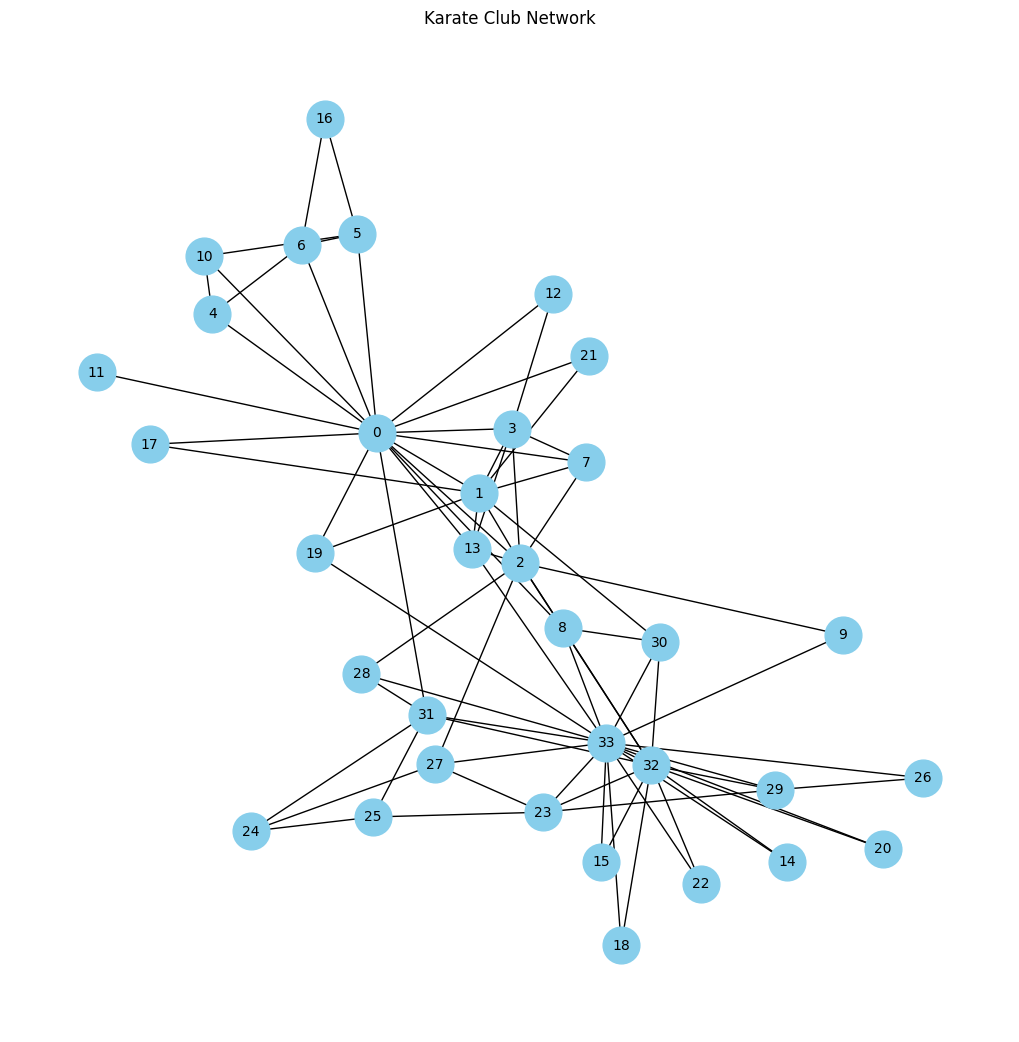

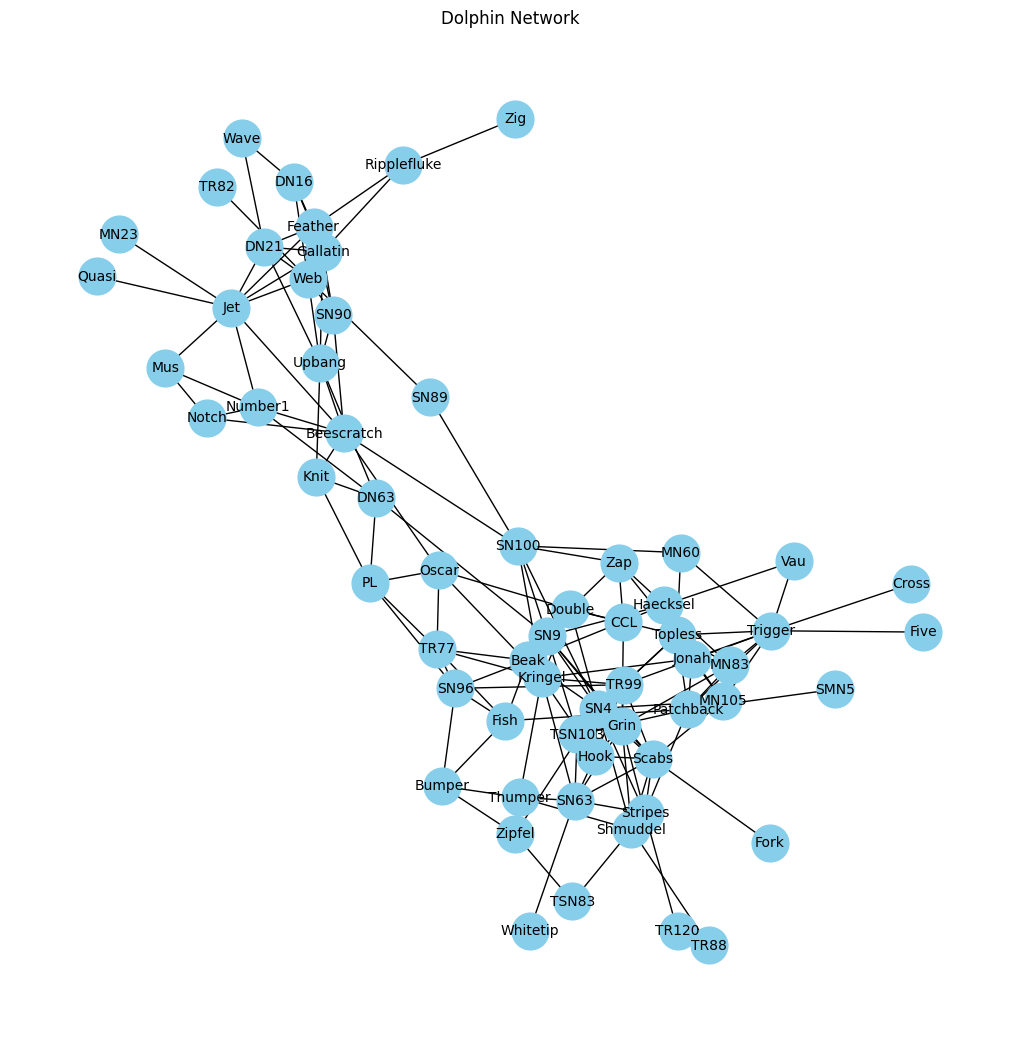

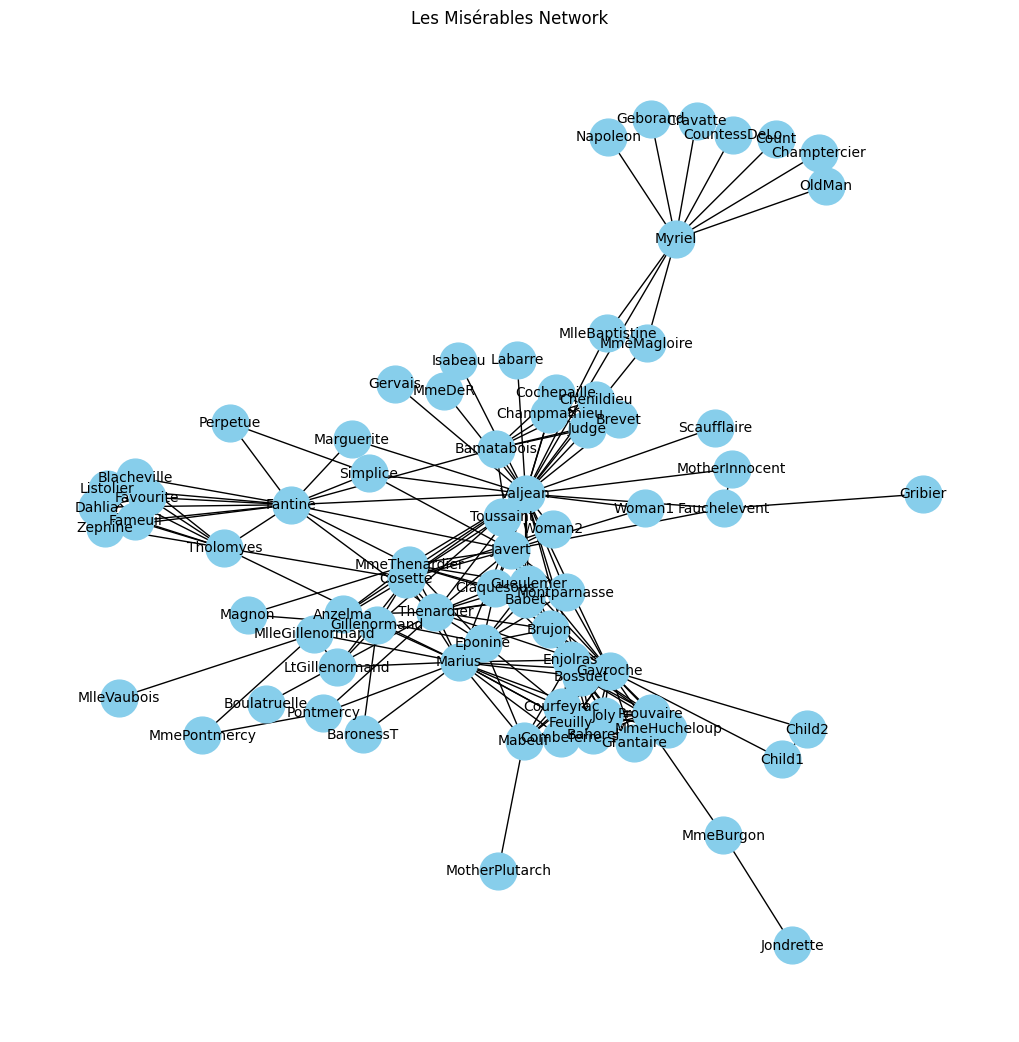

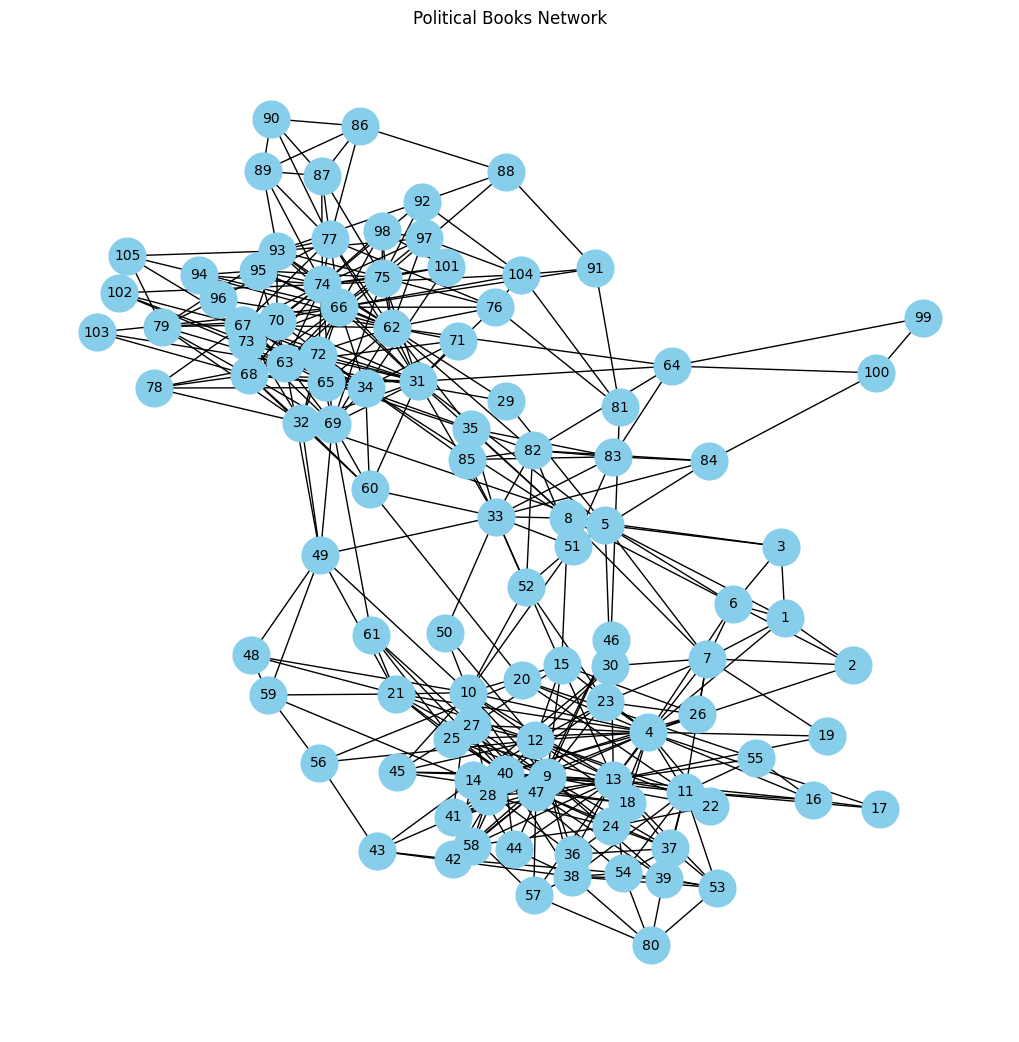

In [4]:
# Visualization of graphs
def visualize_graph(graph, title):
    plt.figure(figsize=(10, 10))
    nx.draw(graph, with_labels=True, node_size=700, node_color="skyblue", font_size=10)
    plt.title(title)
    plt.show()

visualize_graph(karate_graph, "Karate Club Network")
visualize_graph(dolphin_graph, "Dolphin Network")
visualize_graph(les_miserables_graph, "Les Misérables Network")
visualize_graph(polbooks_graph, "Political Books Network")

In [5]:
# Feature extraction - Calculate various measures for nodes
def extract_features(graph):
    degree_centrality = nx.degree_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)

    nstart = {node: random.random() for node in graph.nodes()}
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=5000, nstart=nstart)

    clustering_coefficient = nx.clustering(graph)
    pagerank = nx.pagerank(graph)

    katz_centrality = nx.katz_centrality(graph, max_iter=5000, alpha=0.05, nstart={node: random.random() for node in graph.nodes()})

    harmonic_centrality = nx.harmonic_centrality(graph)
    assortativity = nx.degree_assortativity_coefficient(graph)
    avg_neighbor_degree = nx.average_neighbor_degree(graph)

    data = {
        "Degree Centrality": degree_centrality,
        "Betweenness Centrality": betweenness_centrality,
        "Closeness Centrality": closeness_centrality,
        "Eigenvector Centrality": eigenvector_centrality,
        "Clustering Coefficient": clustering_coefficient,
        "PageRank": pagerank,
        "Katz Centrality": katz_centrality,
        "Harmonic Centrality": harmonic_centrality,
        "Assortativity": assortativity,
        "Avg Neighbor Degree": avg_neighbor_degree
    }

    return pd.DataFrame(data)

karate_features = extract_features(karate_graph)
dolphin_features = extract_features(dolphin_graph)
les_miserables_features = extract_features(les_miserables_graph)
polbooks_features = extract_features(polbooks_graph)

In [6]:
datasets = [
    ("karate", karate_features),
    ("dolphin", dolphin_features),
    ("les_miserables", les_miserables_features),
    ("polbooks", polbooks_features)
]

# Loop to save features into files and download them
for dataset_name, dataset_features in datasets:
    file_path = f"{dataset_name}_features.txt"

    # Convert the dataframe to string and write it to the file
    with open(file_path, 'w') as f:
        f.write(dataset_features.to_string())

    print(f"Features for {dataset_name} saved to {file_path}")

    # Download files from Google Colab
    files.download(file_path)

Features for karate saved to karate_features.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features for dolphin saved to dolphin_features.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features for les_miserables saved to les_miserables_features.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Features for polbooks saved to polbooks_features.txt


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
# Function to identify important features using PCA
def identify_important_features(features, top_n=4):  # Add top_n parameter for the number of important features

    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(features)

    # Apply PCA after scaling
    pca = PCA(n_components=5)  # reduced to 5 components
    pca.fit(X_scaled)

    # Get the importance of each feature
    loadings = pd.DataFrame(pca.components_.T, index=features.columns, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

    # Calculate the importance of features and sort based on importance
    important_features = loadings.abs().sum(axis=1).sort_values(ascending=False)

    # Select the top_n important features
    top_important_features = important_features.head(top_n)

    return top_important_features

datasets = [
    ("karate", karate_features),
    ("dolphin", dolphin_features),
    ("les_miserables", les_miserables_features),
    ("polbooks", polbooks_features)
]

for dataset_name, dataset_features in datasets:

    # Identify important features
    important_features = identify_important_features(dataset_features, top_n=4)  # Display top 4 important features

    # Print top features for the current dataset
    print(f"\nTop 4 Important Features for {dataset_name} Dataset:")
    print(important_features)


Top 4 Important Features for karate Dataset:
Avg Neighbor Degree       1.796306
Closeness Centrality      1.795466
Betweenness Centrality    1.761073
Clustering Coefficient    1.584109
dtype: float64

Top 4 Important Features for dolphin Dataset:
Betweenness Centrality    1.820554
Closeness Centrality      1.620418
Clustering Coefficient    1.587399
Avg Neighbor Degree       1.574496
dtype: float64

Top 4 Important Features for les_miserables Dataset:
Clustering Coefficient    1.968058
Betweenness Centrality    1.867463
Avg Neighbor Degree       1.723356
Closeness Centrality      1.557331
dtype: float64

Top 4 Important Features for polbooks Dataset:
Eigenvector Centrality    2.104399
Clustering Coefficient    1.990822
Avg Neighbor Degree       1.709585
Betweenness Centrality    1.497471
dtype: float64



Karate Club Dataset:


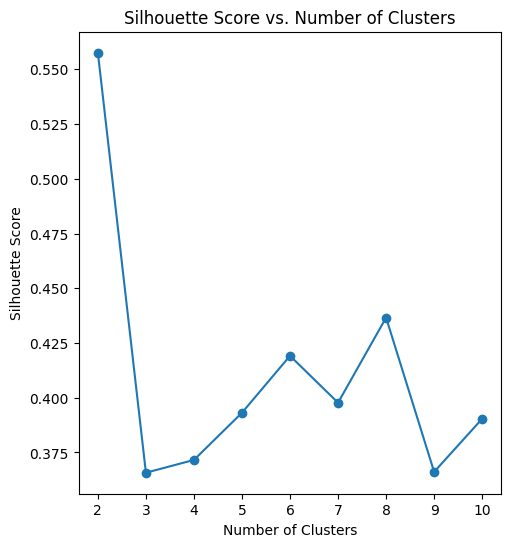

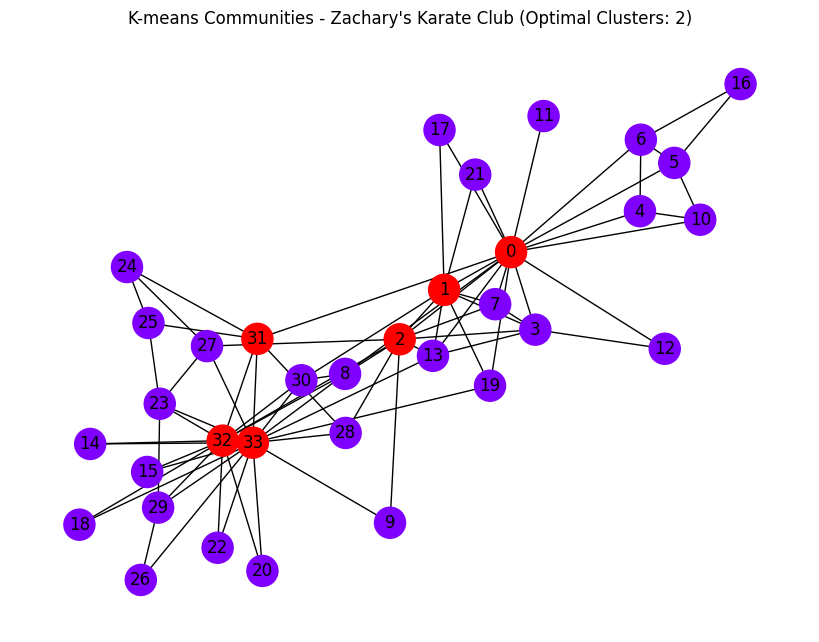


Dolphin Dataset:


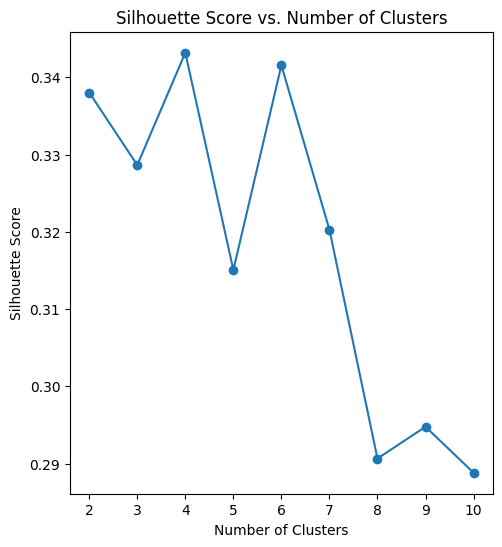

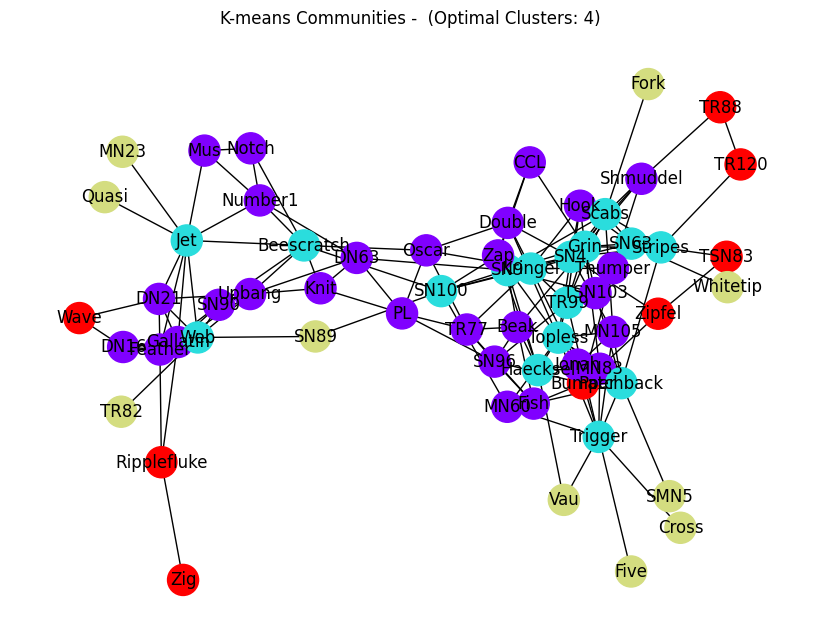


Les Misérables Dataset:


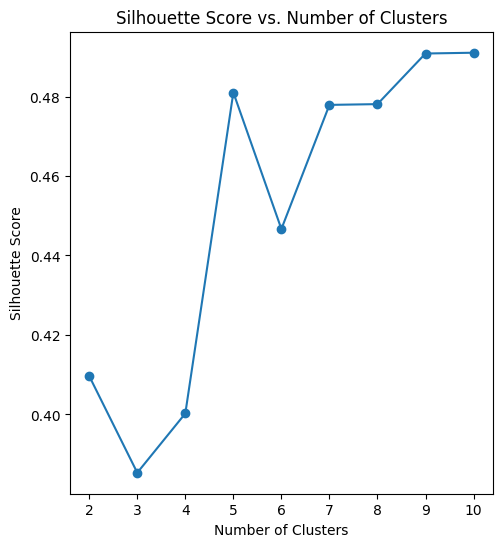

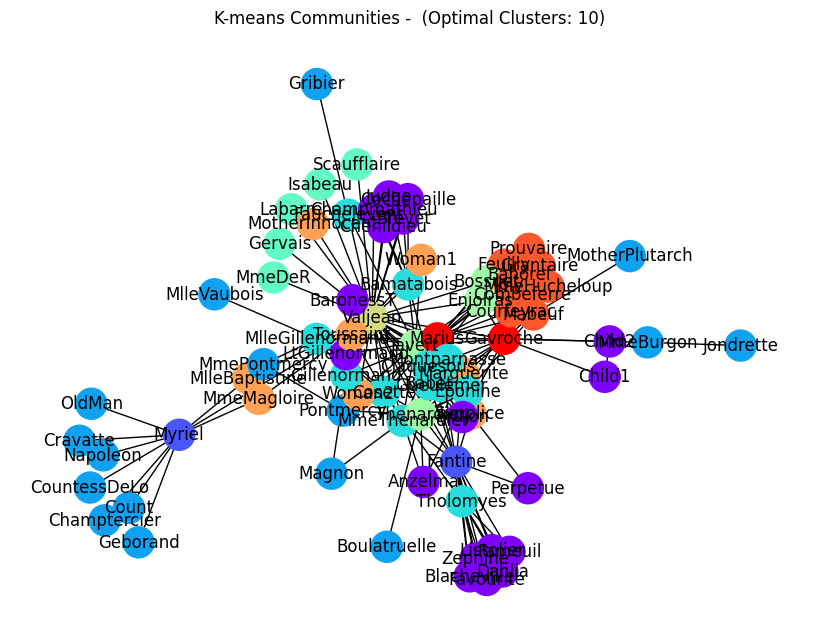


Polbooks Dataset:


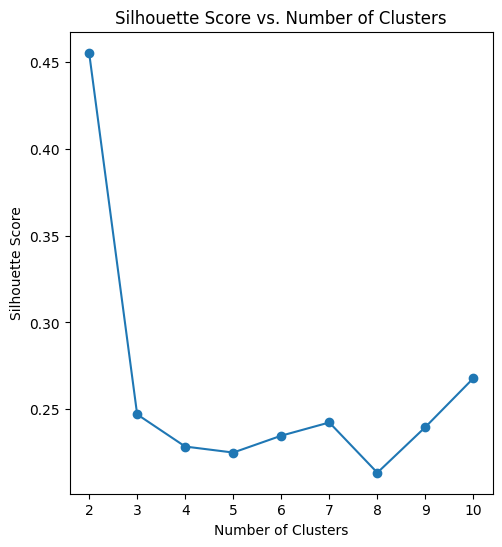

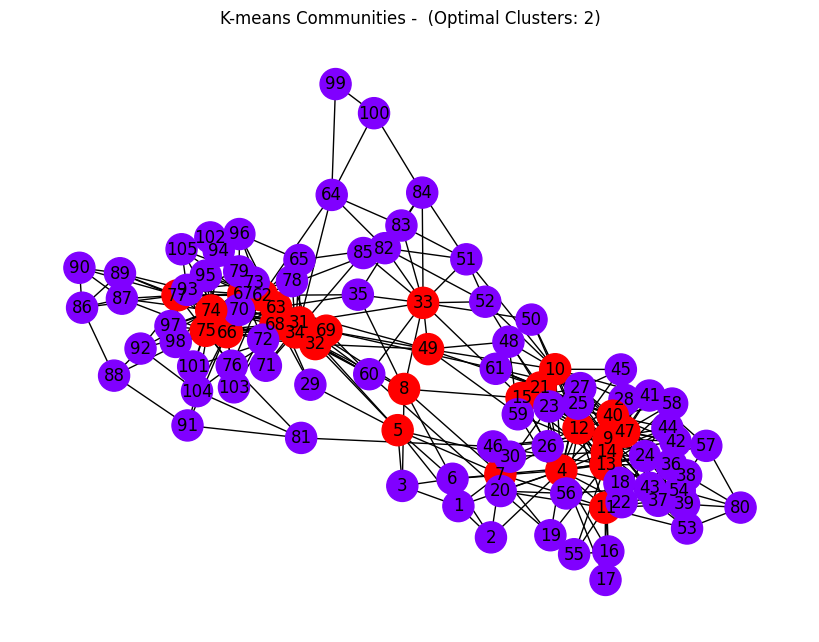

In [10]:
# Function to visualize the communities
def visualize_communities(graph, labels, title):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(
        graph, pos, node_color=labels, cmap=plt.cm.rainbow, with_labels=True, node_size=500, font_size=12
    )
    plt.title(title)
    plt.show()

# Function to find the optimal number of clusters
def find_optimal_clusters(features, max_clusters=10):
    silhouette_avg = []

    # Try different values of clusters
    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(features)
        silhouette_avg.append(silhouette_score(features, kmeans.labels_))  # Silhouette score

    # Plot Silhouette score
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, max_clusters + 1), silhouette_avg, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    # Return the optimal number of clusters based on the maximum silhouette score
    optimal_clusters = silhouette_avg.index(max(silhouette_avg)) + 2
    return optimal_clusters

# Function to detect and visualize communities using the K-means clustering
def detect_and_visualize_communities(graph, features, method_name):

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Find the optimal number of clusters using Silhouette Score
    optimal_clusters = find_optimal_clusters(scaled_features)

    # Perform K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
    labels = kmeans.fit_predict(scaled_features)

    # Visualize the communities on the graph
    visualize_communities(
        graph,
        labels,
        f"{method_name} Communities - {graph.name} (Optimal Clusters: {optimal_clusters})"
    )

    return labels

# Apply community detection for each dataset
# Karate Club Dataset
print("\nKarate Club Dataset:")
karate_labels_kmeans = detect_and_visualize_communities(
    karate_graph,
    karate_features.values,
    method_name="K-means"
)

# Dolphin Dataset
print("\nDolphin Dataset:")
dolphin_labels_kmeans = detect_and_visualize_communities(
    dolphin_graph,
    dolphin_features.values,
    method_name="K-means"
)

# Les Misérables Dataset
print("\nLes Misérables Dataset:")
les_miserables_labels_kmeans = detect_and_visualize_communities(
    les_miserables_graph,
    les_miserables_features.values,
    method_name="K-means"
)

# Polbooks Dataset
print("\nPolbooks Dataset:")
polbooks_labels_kmeans = detect_and_visualize_communities(
    polbooks_graph,
    polbooks_features.values,
    method_name="K-means"
)


Karate Club Dataset:


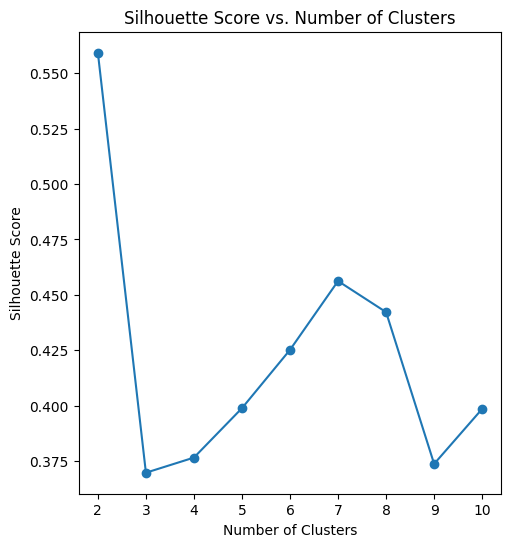

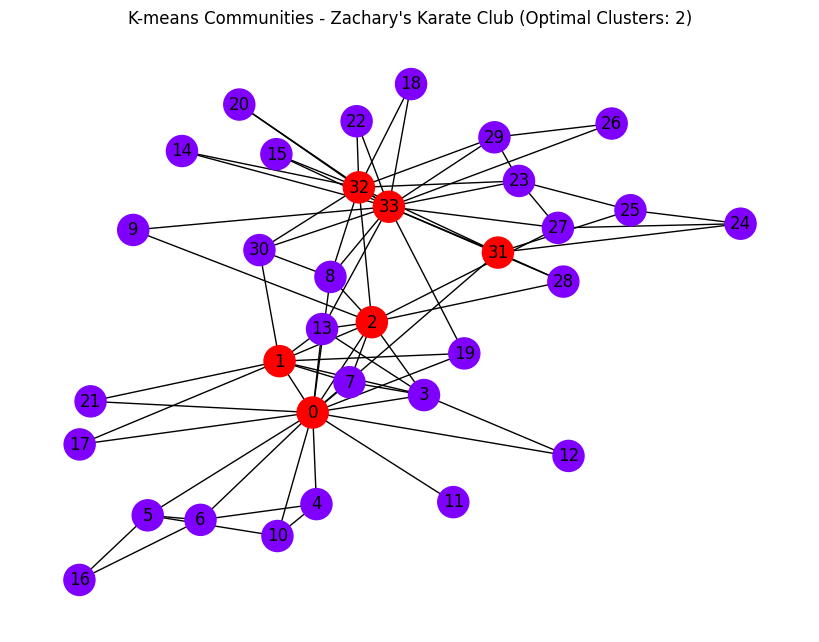


Dolphin Dataset:


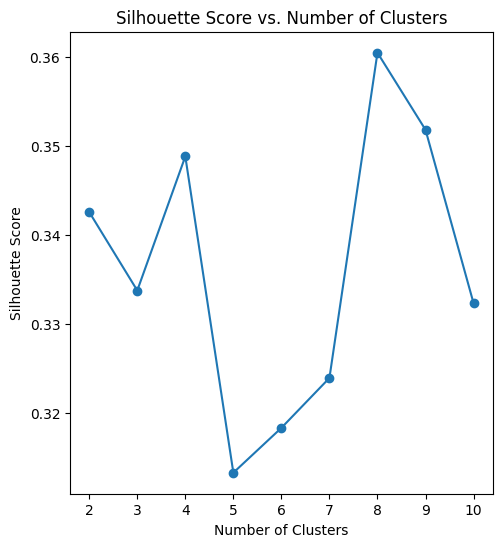

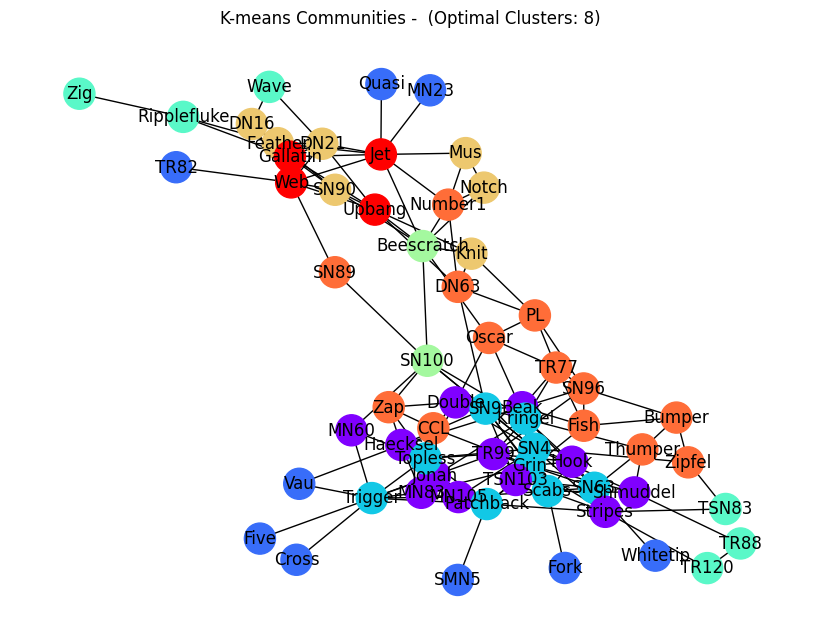


Les Misérables Dataset:


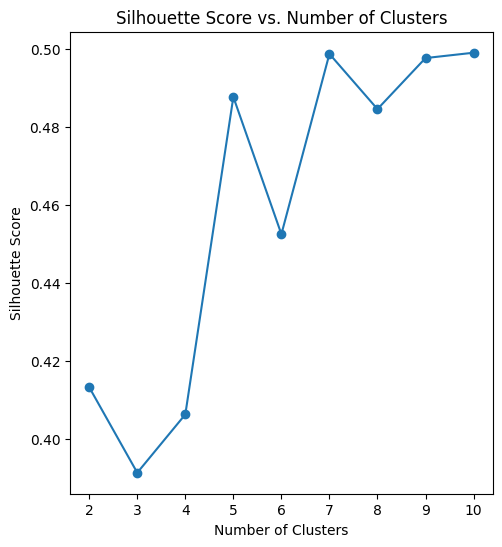

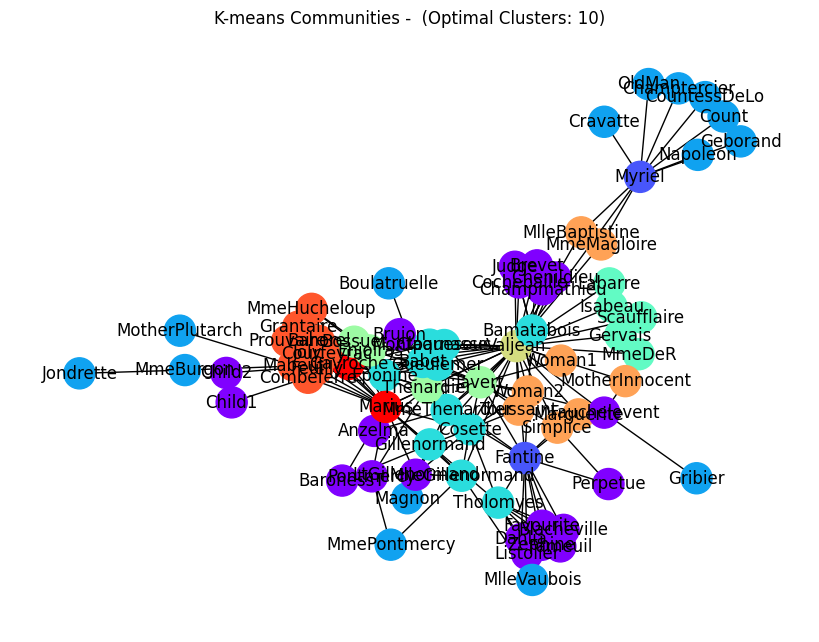


Polbooks Dataset:


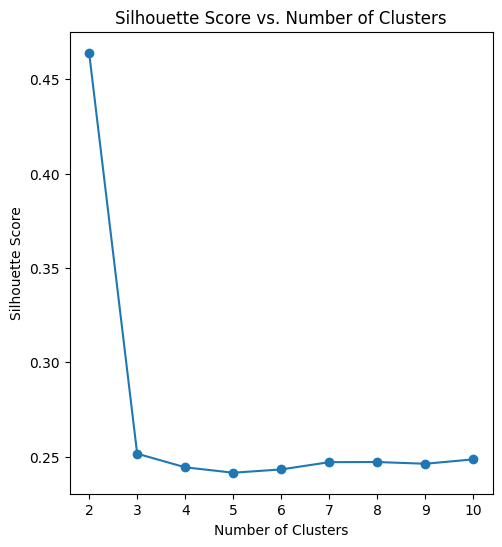

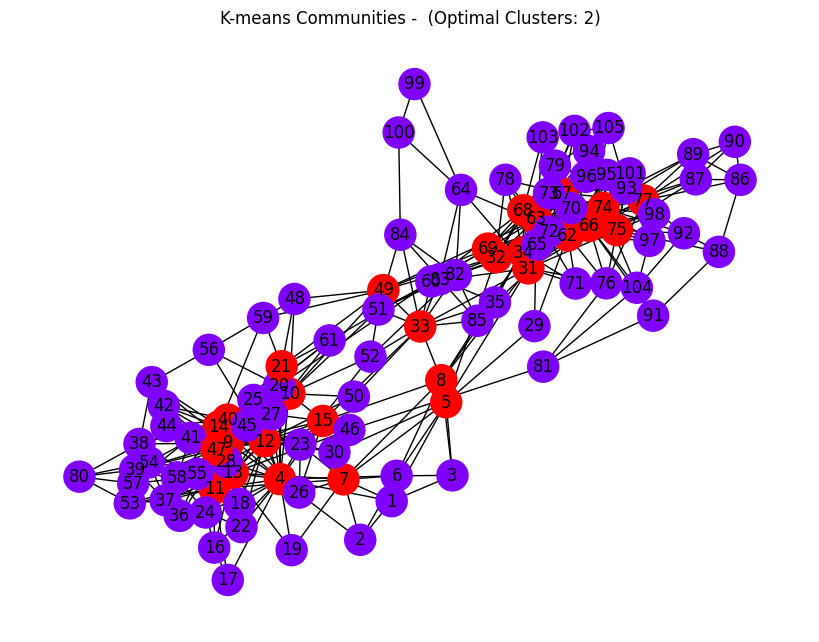

In [11]:
# Function to visualize the communities
def visualize_communities(graph, labels, title):
    pos = nx.spring_layout(graph)
    plt.figure(figsize=(8, 6))
    nx.draw(
        graph, pos, node_color=labels, cmap=plt.cm.rainbow, with_labels=True, node_size=500, font_size=12
    )
    plt.title(title)
    plt.show()

# Function to reduce dimensions with PCA
def reduce_dimensions_pca(features, n_components=5):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features

# Function to detect and visualize communities using K-means
def detect_and_visualize_communities_pca(graph, features, method_name):

    # Standardize the features
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(features)

    # Reduce dimensions to 5 using PCA
    reduced_features = reduce_dimensions_pca(scaled_features, n_components=5)

    # Find optimal number of clusters using Silhouette Score
    silhouette_avg = []
    for n_clusters in range(2, 11):  # Try clusters from 2 to 10
        kmeans = KMeans(n_clusters=n_clusters, random_state=0)
        kmeans.fit(reduced_features)
        silhouette_avg.append(silhouette_score(reduced_features, kmeans.labels_))  # Silhouette score

    # Plot Silhouette score
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(range(2, 11), silhouette_avg, marker='o')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.show()

    optimal_clusters_pca = silhouette_avg.index(max(silhouette_avg)) + 2

    # Apply K-means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=optimal_clusters_pca, random_state=0)
    labels = kmeans.fit_predict(reduced_features)

    # Visualize the communities
    visualize_communities(
        graph,
        labels,
        f"{method_name} Communities - {graph.name} (Optimal Clusters: {optimal_clusters_pca})"
    )

    return labels

# Apply community detection for each dataset
# Karate Club Dataset
print("\nKarate Club Dataset:")
karate_pca_labels_kmeans = detect_and_visualize_communities_pca(
    karate_graph,
    karate_features.values,
    method_name="K-means"
)

# Dolphin Dataset
print("\nDolphin Dataset:")
dolphin_pca_labels_kmeans = detect_and_visualize_communities_pca(
    dolphin_graph,
    dolphin_features.values,
    method_name="K-means"
)

# Les Misérables Dataset
print("\nLes Misérables Dataset:")
les_miserables_pca_labels_kmeans = detect_and_visualize_communities_pca(
    les_miserables_graph,
    les_miserables_features.values,
    method_name="K-means"
)

# Polbooks Dataset
print("\nPolbooks Dataset:")
polbooks_pca_labels_kmeans = detect_and_visualize_communities_pca(
    polbooks_graph,
    polbooks_features.values,
    method_name="K-means"
)

In [12]:
# Function to calculate Modularity, NMI, and ARI
def compare_clustering_performance(graph, labels_original, labels_pca):

    # Create clusters for modularity calculation
    def get_clusters(labels):
        clusters = {}
        for node, label in zip(graph.nodes(), labels):
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(node)
        return list(clusters.values())

    clusters_original = get_clusters(labels_original)
    clusters_pca = get_clusters(labels_pca)

    # Calculate Modularity for the original and PCA-based clustering
    modularity_original = nx.algorithms.community.modularity(graph, clusters_original)
    modularity_pca = nx.algorithms.community.modularity(graph, clusters_pca)

    # Calculate Normalized Mutual Information (NMI) and Adjusted Rand Index (ARI)
    nmi = normalized_mutual_info_score(labels_original, labels_pca)

    ari = adjusted_rand_score(labels_original, labels_pca)

    # Print the results for comparison
    print(f"\nComparison for {dataset_name} dataset:")
    print(f"Modularity (Original Features): {modularity_original:.4f}")
    print(f"Modularity (PCA Features): {modularity_pca:.4f}")

    print(f"NMI between Original and PCA-based labels: {nmi:.4f}")
    print(f"ARI between Original and PCA-based labels: {ari:.4f}")


datasets = [
    ("karate", karate_graph, karate_labels_kmeans, karate_pca_labels_kmeans),
    ("dolphin", dolphin_graph, dolphin_labels_kmeans, dolphin_pca_labels_kmeans),
    ("les_miserables", les_miserables_graph, les_miserables_labels_kmeans, les_miserables_pca_labels_kmeans),
    ("polbooks", polbooks_graph, polbooks_labels_kmeans, polbooks_pca_labels_kmeans)
]

# Loop through each dataset and perform the comparison
for dataset_name, graph, labels_original, labels_pca in datasets:

    # Perform comparison
    compare_clustering_performance(graph, labels_original, labels_pca)


Comparison for karate dataset:
Modularity (Original Features): -0.1401
Modularity (PCA Features): -0.1401
NMI between Original and PCA-based labels: 1.0000
ARI between Original and PCA-based labels: 1.0000

Comparison for dolphin dataset:
Modularity (Original Features): 0.0342
Modularity (PCA Features): 0.0992
NMI between Original and PCA-based labels: 0.5998
ARI between Original and PCA-based labels: 0.3497

Comparison for les_miserables dataset:
Modularity (Original Features): 0.1765
Modularity (PCA Features): 0.1709
NMI between Original and PCA-based labels: 0.9514
ARI between Original and PCA-based labels: 0.9135

Comparison for polbooks dataset:
Modularity (Original Features): -0.0533
Modularity (PCA Features): -0.0533
NMI between Original and PCA-based labels: 1.0000
ARI between Original and PCA-based labels: 1.0000


In [13]:
# Function to calculate Modularity, NMI, and ARI
def compare_clustering_performance(graph, labels_lpa, newman_labels, labels_pca):

    # Create clusters for modularity calculation
    def get_clusters(labels):
        clusters = {}
        for node, label in zip(graph.nodes(), labels):
            if label not in clusters:
                clusters[label] = []
            clusters[label].append(node)
        return list(clusters.values())

    clusters_pca = get_clusters(labels_pca)
    clusters_newman = get_clusters(newman_labels)
    clusters_lpa = get_clusters(labels_lpa)

    # Calculate Modularity
    modularity_pca = nx.algorithms.community.modularity(graph, clusters_pca)
    modularity_newman = nx.algorithms.community.modularity(graph, clusters_newman)
    modularity_lpa = nx.algorithms.community.modularity(graph, clusters_lpa)

    # Calculate Normalized Mutual Information (NMI) and Adjusted Rand Index (ARI)
    nmi_newman = normalized_mutual_info_score(newman_labels, labels_pca)
    ari_newman = adjusted_rand_score(newman_labels, labels_pca)

    nmi_lpa = normalized_mutual_info_score(labels_lpa, labels_pca)
    ari_lpa = adjusted_rand_score(labels_lpa, labels_pca)

    # Print the results for comparison
    print(f"\nComparison for {dataset_name} dataset:")
    print(f"Modularity (PCA Features): {modularity_pca:.4f}")
    print(f"Modularity (Newman Algorithm): {modularity_newman:.4f}")
    print(f"Modularity (Label Propagation): {modularity_lpa:.4f}")

    print(f"NMI between Newman-Girvan and PCA-based labels: {nmi_newman:.4f}")
    print(f"ARI between Newman-Girvan and PCA-based labels: {ari_newman:.4f}")

    print(f"NMI between LPA and PCA-based labels: {nmi_lpa:.4f}")
    print(f"ARI between LPA and PCA-based labels: {ari_lpa:.4f}")


# Function to extract true labels for community detection using Girvan-Newman algorithm
def newman_girvan_calculate(graph):
    # Apply the Girvan-Newman algorithm to detect communities
    comp = girvan_newman(graph)

    # Get the top-level communities from the first split
    top_level_communities = next(comp)

    # Create a dictionary to store the labels for each node
    node_to_label = {}
    for idx, community in enumerate(top_level_communities):
        for node in community:
            node_to_label[node] = idx

    # Return the list of true labels corresponding to each node in the graph
    newman_labels = [node_to_label[node] for node in graph.nodes()]
    return newman_labels


# Function to extract community labels using Label Propagation Algorithm (LPA)
def label_propagation(graph):
    # Apply Label Propagation to find communities
    communities = list(label_propagation_communities(graph))
    node_to_label = {}

    # Create a label mapping for each node
    for idx, community in enumerate(communities):
        for node in community:
            node_to_label[node] = idx

    # Return the labels as a list for each node
    return [node_to_label[node] for node in graph.nodes()]


datasets = [
    ("karate", karate_graph, karate_pca_labels_kmeans),
    ("dolphin", dolphin_graph, dolphin_pca_labels_kmeans),
    ("les_miserables", les_miserables_graph, les_miserables_pca_labels_kmeans),
    ("polbooks", polbooks_graph, polbooks_pca_labels_kmeans)
]

# Loop through each dataset and perform the comparison
for dataset_name, graph, labels_pca in datasets:

    newman_labels = newman_girvan_calculate(graph)
    labels_lpa = label_propagation(graph)

    # Perform comparison
    compare_clustering_performance(graph, labels_lpa, newman_labels, labels_pca)


Comparison for karate dataset:
Modularity (PCA Features): -0.1401
Modularity (Newman Algorithm): 0.3477
Modularity (Label Propagation): 0.3095
NMI between Newman-Girvan and PCA-based labels: 0.0090
ARI between Newman-Girvan and PCA-based labels: -0.0237
NMI between LPA and PCA-based labels: 0.0260
ARI between LPA and PCA-based labels: -0.0446

Comparison for dolphin dataset:
Modularity (PCA Features): 0.0992
Modularity (Newman Algorithm): 0.3787
Modularity (Label Propagation): 0.4986
NMI between Newman-Girvan and PCA-based labels: 0.2649
ARI between Newman-Girvan and PCA-based labels: 0.1190
NMI between LPA and PCA-based labels: 0.3859
ARI between LPA and PCA-based labels: 0.1332

Comparison for les_miserables dataset:
Modularity (PCA Features): 0.1709
Modularity (Newman Algorithm): 0.0746
Modularity (Label Propagation): 0.5267
NMI between Newman-Girvan and PCA-based labels: 0.1462
ARI between Newman-Girvan and PCA-based labels: 0.0296
NMI between LPA and PCA-based labels: 0.4820
ARI 